# USING PCA and LDA on sklearn load.digits dataset:


In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt  
import sklearn
from sklearn.model_selection import train_test_split 

In [5]:
from sklearn.datasets import load_digits

In [16]:
digits=load_digits()
x= digits.data
y= digits.target

In [12]:
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

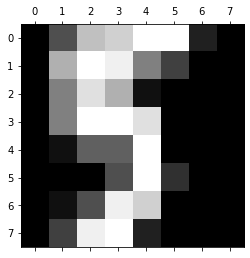

5


In [20]:
plt.gray()
plt.matshow(digits.images[15])
plt.show()
print(y[15])

In [21]:
x_train, x_test, y_train, y_test= train_test_split(x,y)

## 1) PCA:

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(n_components=0.95)

In [55]:
pca.fit(x_train)
x_test_pca=pca.transform(x_test)
x_train_pca=pca.transform(x_train)


In [64]:
print ("old shape train:",x_train.data.shape)
print ("transformed shape train:", x_train_pca.data.shape)
print ("old shape test", x_test.data.shape)
print ("transformed shape train:", x_test_pca.data.shape )
print ( y_train.data.shape )


old shape train: (1347, 64)
transformed shape train: (1347, 29)
old shape test (450, 64)
transformed shape train: (450, 29)
(1347,)


## 2) LDA:

In [41]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda 
lda=lda()

In [45]:
lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [46]:
x_train_lda=lda.transform(x_train)
x_test_lda= lda.transform(x_test)

In [ ]:
print ("old train shape:", x_train.data.shape )
print ("transformed train shape:", x_train_lda.data.shape )
print ("old test shape:", x_test.data.shape)
print ("transformed train shape:", x_test_lda.data.shape )

## 3) Performing logistic regression: 

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

### Checking performance with pca transformed data:

In [56]:
lr.fit(x_train_pca, y_train)

/home/siddharth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [57]:
lr.score(x_test_pca, y_test)

0.9466666666666667

### Checking performance with lda transformed data:


In [62]:
lr.fit(x_train_lda, y_train)

LogisticRegression()

In [63]:
lr.score(x_test_lda, y_test)

0.9377777777777778

**Conclusion: PCA has performed better in this case**